<a href="https://colab.research.google.com/github/Kiruthika-KB/Final-Project/blob/main/Ratings_of_Guvi_Courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("guvi_courses_dataset.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   course_title                 500 non-null    object 
 1   url                          500 non-null    object 
 2   price (in 1000s)             500 non-null    float64
 3   num_subscribers              500 non-null    int64  
 4   num_reviews                  500 non-null    int64  
 5   num_lectures                 500 non-null    int64  
 6   level                        500 non-null    object 
 7   rating                       500 non-null    float64
 8   content_duration (In Hours)  500 non-null    float64
 9   published_timestamp          500 non-null    object 
 10  subject                      500 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 43.1+ KB
None


In [ ]:
data.shape

(500, 11)

In [ ]:
data.head(2)

,course_title,url,price (in 1000s),num_subscribers,num_reviews,num_lectures,level,rating,content_duration (In Hours),published_timestamp,subject
0,Web Development Mastery,https://guvi.in/web-development-mastery,41.94,2497,504,76,Advanced,3.8,49.9,14-06-2022 14:10,Data Science
1,AI Fundamentals,https://guvi.in/ai-fundamentals,48.07,3064,1292,85,Intermediate,4.3,42.9,03-05-2020 20:26,Blockchain


In [ ]:
data['course_title'].unique()

array(['Web Development Mastery', 'AI Fundamentals',
       'JavaScript Essentials', 'Cloud Computing Basics',
       'Game Development with Unity', 'Big Data Analytics',
       'Data Science Bootcamp', 'Blockchain Essentials',
       'Machine Learning Advanced', 'DevOps Crash Course',
       'Python for Beginners', 'Cybersecurity 101'], dtype=object)

In [ ]:
data.columns

Index(['course_title', 'url', 'price (in 1000s)', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'rating',
       'content_duration (In Hours)', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
# Extract year and month from published_timestamp
data['published_year'] = pd.to_datetime(data['published_timestamp']).dt.year
data['published_month'] = pd.to_datetime(data['published_timestamp']).dt.month


<ipython-input-38-961f8dcc2ffb>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['published_year'] = pd.to_datetime(data['published_timestamp']).dt.year
<ipython-input-38-961f8dcc2ffb>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['published_month'] = pd.to_datetime(data['published_timestamp']).dt.month


In [ ]:
def normalize_rating(rating):
    if rating <= 2.0:
        return 1
    elif rating <4.0:
        return 3
    else:
        return 5

rate = data['rating']
normalized_ratings = np.array([normalize_rating(r) for r in rate])

# Display the normalized ratings
print(normalized_ratings)

[3 5 5 3 5 5 5 3 5 3 3 5 3 3 5 5 3 3 5 5 5 5 5 5 3 5 3 5 5 3 5 5 5 3 5 3 3
 3 3 5 3 3 5 3 3 5 5 3 3 5 5 3 5 5 3 3 3 5 3 3 3 3 5 5 3 5 5 3 3 5 5 5 3 3
 3 5 3 5 5 3 5 3 3 5 3 3 5 5 3 5 3 3 5 5 3 3 3 5 5 3 5 5 5 3 3 5 3 3 5 3 3
 3 3 5 5 3 3 3 5 3 3 5 3 5 3 3 5 5 5 5 3 5 5 5 3 3 5 5 3 5 3 5 5 3 3 5 3 3
 5 5 3 3 5 5 5 5 3 3 5 3 3 3 3 5 3 3 5 5 3 3 3 3 5 3 3 3 3 5 3 5 5 5 5 5 3
 3 3 3 3 5 5 3 3 3 3 5 3 5 5 5 5 3 5 5 3 5 5 5 5 3 5 3 3 5 5 5 3 3 5 5 3 3
 5 5 5 3 3 5 5 3 5 5 3 3 3 3 3 5 5 5 3 3 5 5 3 3 3 5 3 5 5 5 3 3 5 3 5 5 3
 5 5 3 3 5 5 5 5 5 5 5 3 5 5 3 5 3 5 3 3 3 3 3 5 3 3 5 5 5 3 5 3 5 3 5 5 5
 5 5 5 3 5 3 5 5 5 5 3 3 5 5 3 3 5 5 5 5 3 5 3 3 5 5 3 3 3 5 5 5 3 5 3 5 3
 3 5 5 5 5 3 3 5 5 3 3 5 5 5 3 3 3 5 5 3 5 5 3 5 5 5 3 5 3 5 5 3 5 3 3 5 3
 3 5 5 3 3 3 5 3 3 3 3 5 5 5 5 5 5 3 5 3 3 5 3 5 5 3 3 3 5 5 5 3 3 3 3 3 5
 3 3 5 5 3 5 3 3 3 5 5 5 3 3 3 5 3 5 5 5 3 5 5 5 5 5 5 5 3 5 5 3 3 3 5 5 5
 5 3 5 3 3 5 5 3 3 5 3 5 5 5 5 5 5 5 3 5 5 3 5 5 5 5 5 3 3 5 5 3 3 5 3 5 3
 3 5 3 3 5 5 5 3 5 3 3 3 

In [ ]:
data['rating']=normalized_ratings

In [ ]:
# One-hot encoding for categorical variables
#data = pd.get_dummies(data, columns=['level', 'subject'], drop_first=True)

# Define features and target
X = data.drop(columns=['rating', 'course_title', 'url', 'published_timestamp','level','subject'])
y = data['rating']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
data['rating'].unique()

array([3, 5])

In [ ]:
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.08
R² Score: -0.08


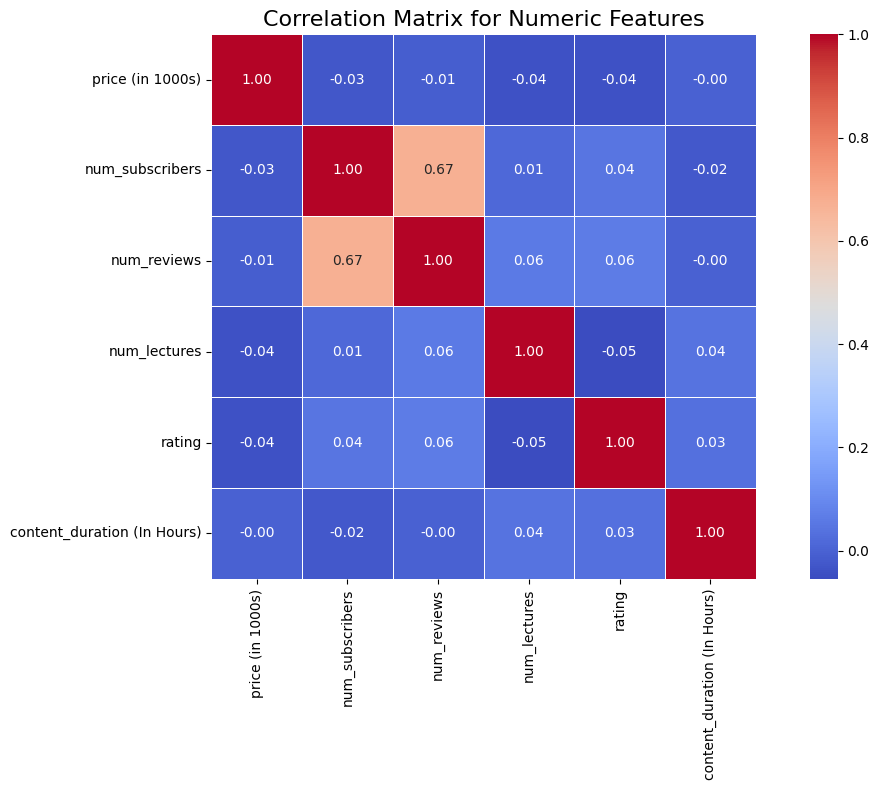

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix_numeric = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix_numeric,
    annot=True,  # Display the correlation values in the heatmap
    cmap="coolwarm",  # Color map for better visualization
    fmt=".2f",  # Format for displaying correlation values
    cbar=True,  # Display the color bar
    linewidths=0.5,  # Add lines between cells for clarity
    square=True  # Ensure the heatmap is square-shaped
)

# Add a title to the heatmap
plt.title('Correlation Matrix for Numeric Features', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()
